In [401]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [403]:
titanic_df = pd.read_csv('C:/Users/philv/Downloads/Udemy-notes-master/Udemy-notes-master/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [407]:
titanic_df.describe()
#Parch means parent/ child on-board
#SibSp means siblings on-board, 1=True and 0=False

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Who were the passengers on the Titanic? (Gender, Ages, Class,..etc)

Lets start with the gender with respect to their Pclass

[Text(0.5, 0, 'Passenger Class'), Text(0, 0.5, 'Number of Passengers')]

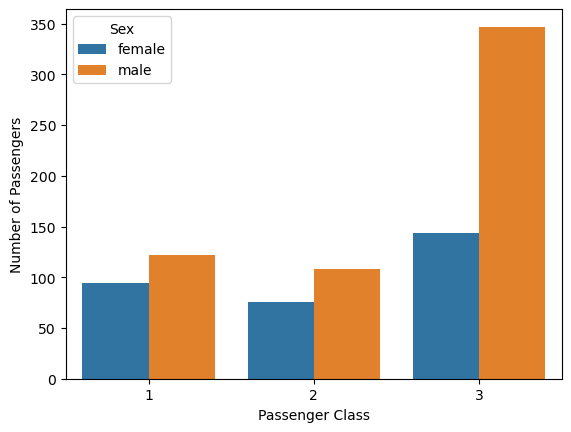

In [410]:
plot = sns.countplot(x='Pclass', data=titanic_df, hue='Sex')
plot.set(xlabel='Passenger Class', ylabel='Number of Passengers')

Lets further classify the passengers as adult and children(less than 16 years)

In [413]:
#create a function to check if a passenger is either a child or an adult: 

def adult_child(passenger):
    age = passenger
    if age <16:
        return 'Child'
    else:
        return 'Adult'

In [415]:
#Create a new column by applying the above function on titanic_df
titanic_df['Person'] = titanic_df['Age'].apply(adult_child)

In [417]:
#Test to confirm that the above function was implemented
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


[Text(0.5, 0, 'Passenger category'),
 Text(0, 0.5, 'Number of passengers'),
 Text(0.5, 1.0, 'Passenger Category vs Frequency')]

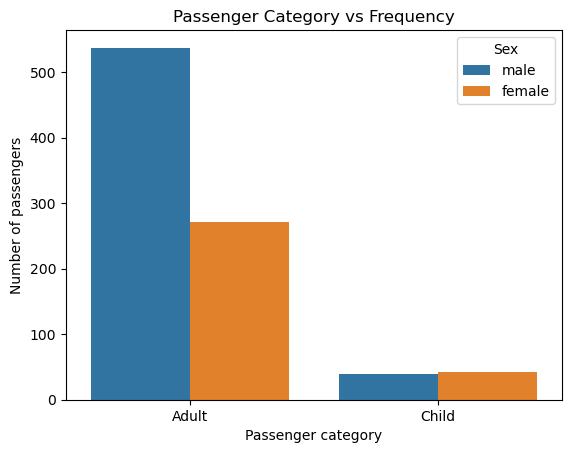

In [419]:
chart = sns.countplot(x='Person', data= titanic_df, hue = 'Sex')
chart.set(xlabel = 'Passenger category', ylabel='Number of passengers', title = 'Passenger Category vs Frequency')


<Axes: >

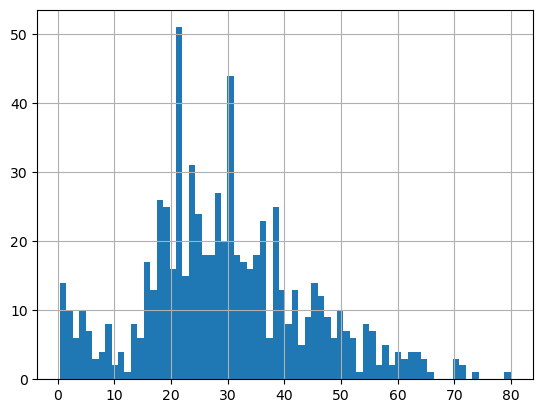

In [421]:
titanic_df['Age'].hist(bins=70)

In [423]:
titanic_df['Age'].mean()

29.69911764705882

In [425]:
titanic_df.Person.value_counts()

Person
Adult    808
Child     83
Name: count, dtype: int64

To plot a kde plot to show the distribution of a given column; Age using displot:

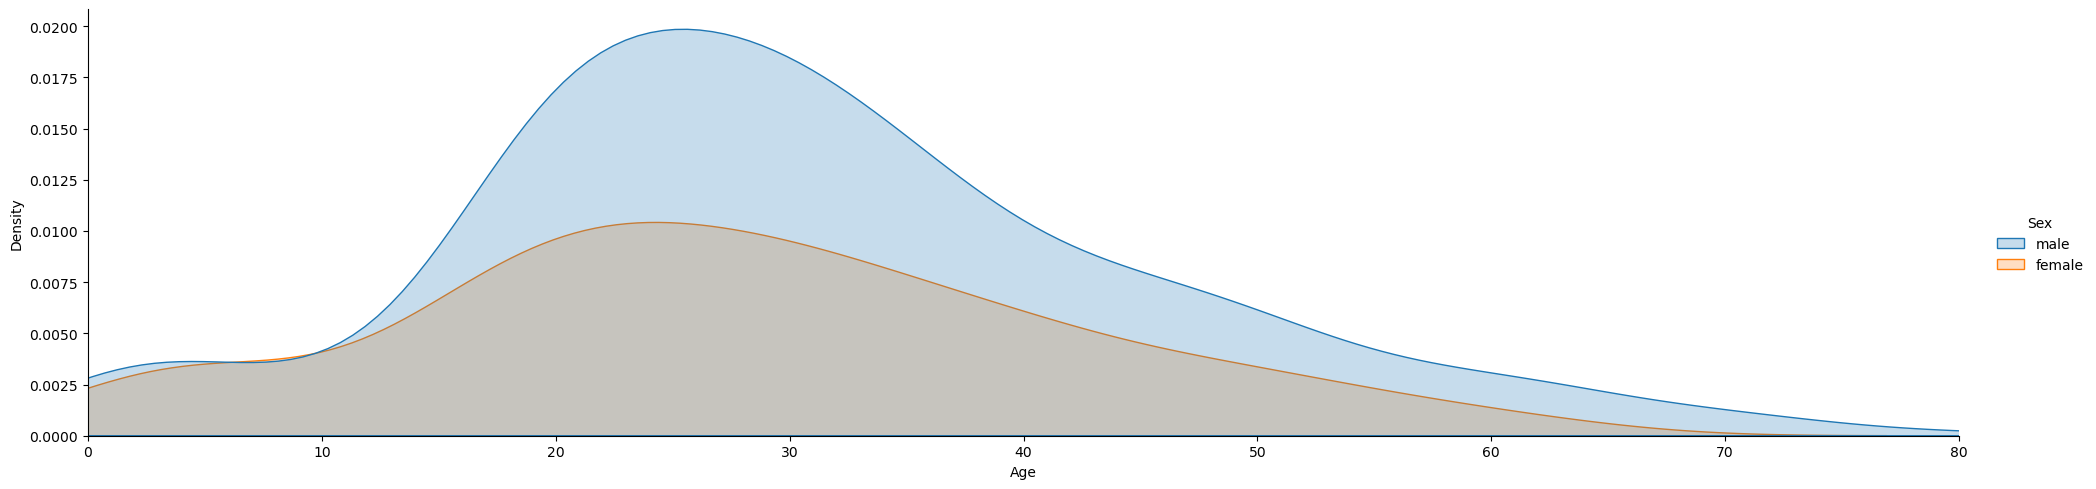

In [428]:
sns.displot(data=titanic_df, x='Age', hue='Sex', kind='kde', aspect= 4, fill=True)
oldest = titanic_df['Age'].max()
plt.xlim(0, oldest)
plt.show()


What deck were the passengers on and how does that relate to their class?

Let's get rid of the null values in the 'Cabin' Column

In [431]:
deck = titanic_df.Cabin.dropna()

In [433]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [435]:
levels = []
for level in deck:
    levels.append(level[0])

#let's create a dataframe called cabin_df from the resulting list, levels
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

cabin_df.Cabin.unique()


array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<Axes: xlabel='Cabin', ylabel='count'>

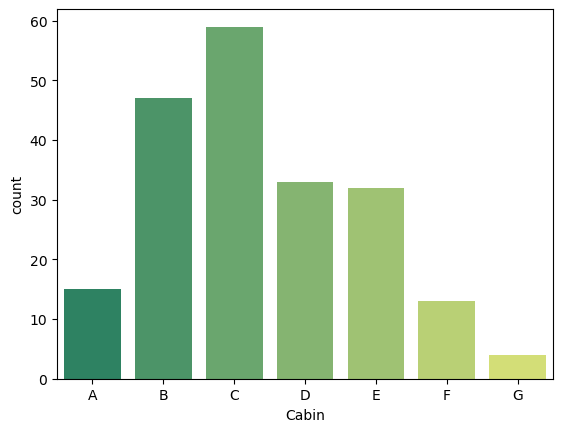

In [437]:
#to drop the T entries in the cabin column and plot the above dataframe using a countplot:

cabin_df = cabin_df[cabin_df.Cabin != 'T']
a = cabin_df['Cabin'].sort_values()
sns.countplot(data = cabin_df, x=a, hue=a, palette = 'summer')

Where did the passengers come from?

The embarked column gives the details of where each passenger embarked on the journey from 
and we will dig in to see what boarding class is predominant in each port.

In [461]:
#First, lets replace the Q, S, C in the Embarked column with the full city name.

titanic_df.Embarked = titanic_df.Embarked.replace({'S':'Southampton', 'Q':'Queenstown', 'C': 'Cherbourg'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult


<Axes: xlabel='Embarked', ylabel='count'>

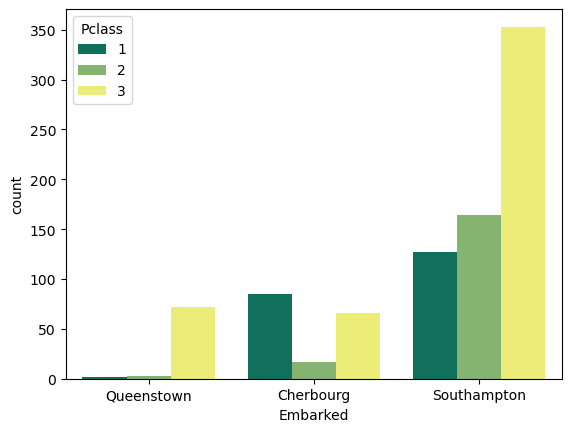

In [471]:
#Next, lets visualize the number of passengers that boarded at the three ports with respect to their passenger class

sns.countplot(data = titanic_df, x='Embarked', hue='Pclass', order=['Queenstown', 'Cherbourg', 'Southampton'], palette = 'summer')

Who was alone and who was with family

In [518]:
#SibSp = Above 0 means the passenger has sibling(s) on board and 0 means they do not
#Parch = Above 0 means the passenger has parent/child on board and 0 means they do not

titanic_df['Family_onboard'] = titanic_df['SibSp'] + titanic_df['Parch']
for number in titanic_df.Family_onboard:
    if number > 0:
        titanic_df['Family_onboard'] = titanic_df.Family_onboard.replace(number, 'With Family')
    else:
        titanic_df['Family_onboard'] = titanic_df.Family_onboard.replace(number, 'Alone')
    
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult,Alone


<Axes: xlabel='Family_onboard', ylabel='count'>

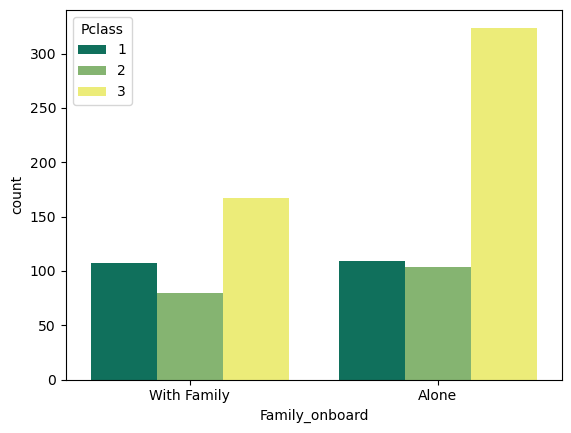

In [569]:
#Let us visualize the number of passengers with family compared to lone passengers with respect to their gender
sns.countplot(data= titanic_df, x='Family_onboard', hue = 'Pclass', palette = 'summer')

Now, we need to create a column to show whether a passenger survived the sinking or not

The Survived column shows 0 and 1 for non-survivors and survivors respectively

<Axes: xlabel='Sex', ylabel='count'>

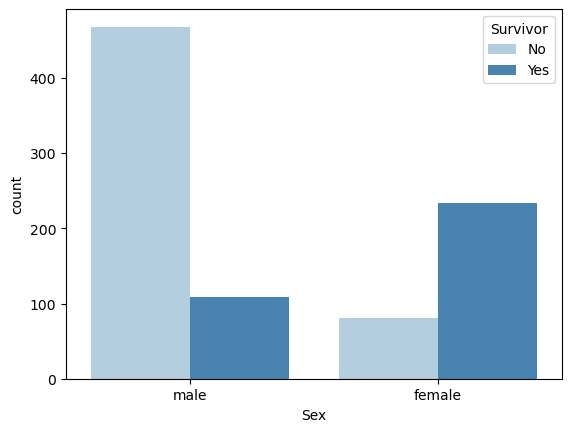

In [587]:
titanic_df['Survivor'] = titanic.Survived.map({0:'No', 1:'Yes'})

sns.countplot(data=titanic_df, x='Sex', hue='Survivor',palette= 'Blues')

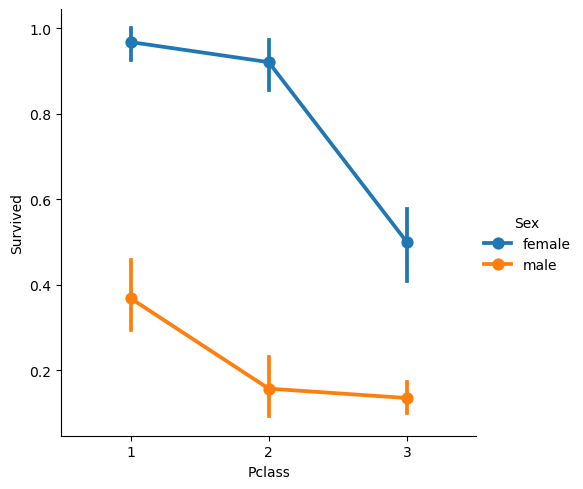

In [613]:
sns.catplot(data=titanic_df, x='Pclass', y= 'Survived', hue='Sex', kind='point')

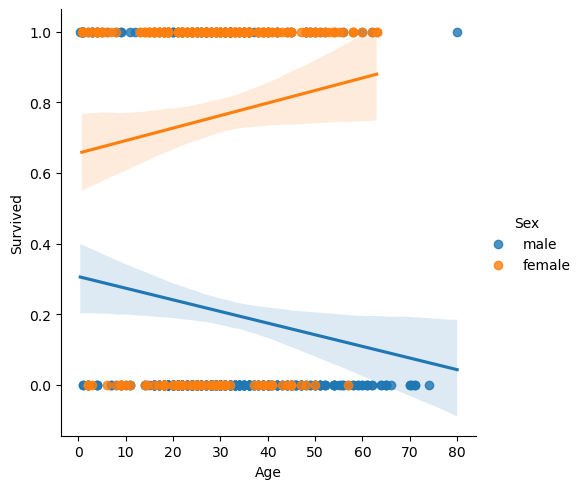

In [619]:
sns.lmplot(x='Age', y='Survived', hue= 'Sex', data=titanic_df)
#Here we can see below that the older the passenger was, the slimmer the chance of survival

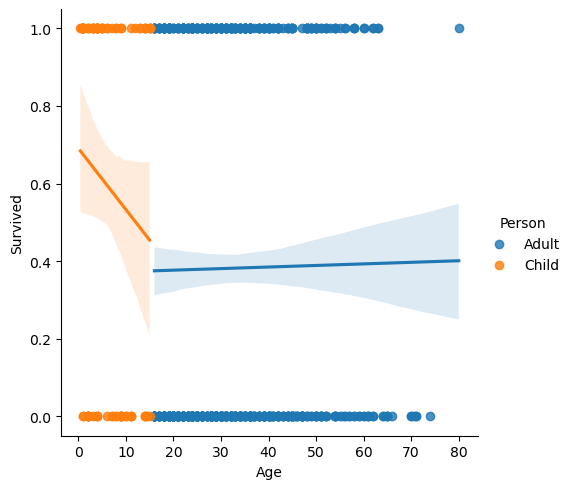

In [621]:
sns.lmplot(x='Age', y='Survived', hue= 'Person', data=titanic_df)

Did the deck have an effect on the survival rate:

In [ ]:
sns.catplot(data=titanic_df, x='', y='Survived', kind='point')

Did having a family member increase the chances of surviving the crash?:

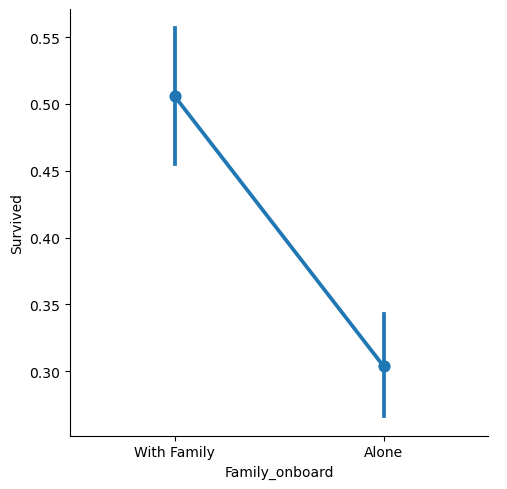

In [634]:
sns.catplot(data=titanic_df, x='Family_onboard', y='Survived', kind='point')